In [9]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [3]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Standardizing the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [15]:
print("First five rows of the preprocessed dataset:")
print(pd.DataFrame(data_scaled, columns=iris.feature_names).head())

First five rows of the preprocessed dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [ ]:
KMeans is an iterative clustering algorithm that aims to minimize intra-cluster variance.

It starts by selecting k random centroids (cluster centers).

Each point is assigned to the nearest centroid based on Euclidean distance.

The centroids are recalculated as the mean of all points in the cluster.

The process repeats until the centroids no longer change significantly.

In [ ]:
Why KMeans is  suitable for the Iris dataset:
The Iris dataset consists of numerical features, which KMeans handles well.
Its efficient for relatively small datasets.
The Iris dataset inherently forms distinct groups,making it a good candidate for KMeans.

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

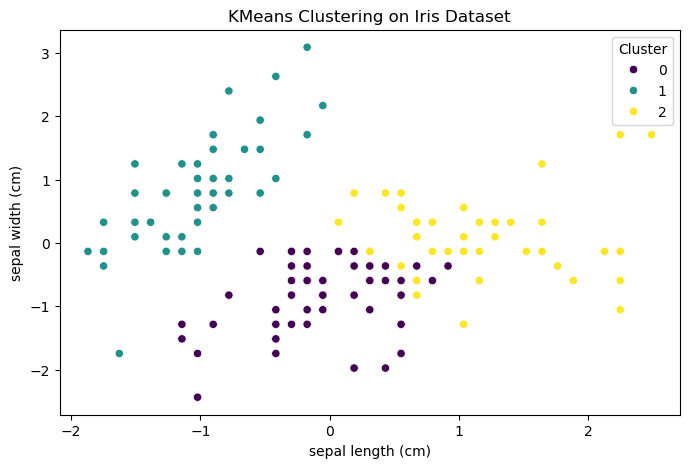

In [19]:
# Visualizing KMeans Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

In [ ]:
Hierarchical clustering is a method that builds a hierarchy of clusters in a step-by-step manner.
There are two main types:

Agglomerative (Bottom-Up Approach)

Each data point starts as its own cluster.

The two closest clusters are merged at each step based on a linkage criterion (e.g., Ward’s method).

This process repeats until we are left with the desired number of clusters.

Divisive (Top-Down Approach)

The entire dataset starts as one big cluster.

It is recursively split into smaller clusters.

In [ ]:
Why Use Hierarchical Clustering?

It provides a dendrogram, which helps visualize how clusters merge.

It doesn’t require the number of clusters to be pre-defined (though we specify it here).

It works well for small to medium-sized datasets like the Iris dataset.

In [21]:
# Hierarchical Clustering
# Hierarchical clustering builds a hierarchy of clusters either in an agglomerative (bottom-up) or divisive (top-down) approach.
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

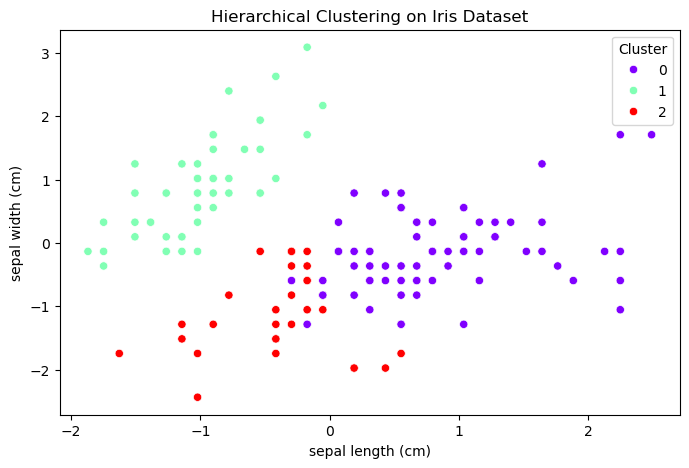

In [25]:
# Visualizing Hierarchical Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hierarchical_labels, palette='rainbow')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

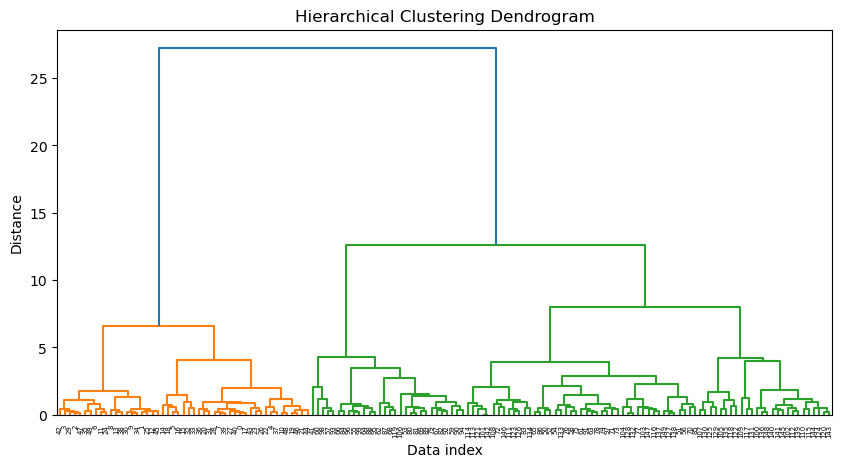

In [29]:
# Dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data index')
plt.ylabel('Distance')
plt.show()